In [1]:
import os
import json
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import time
import copy
import gc


In [2]:
model_path = 'Models_Warwick_100/'
TRAINING_FOLDER = os.listdir(model_path+'TrainingTime/')
TRAINING_FOLDER.sort()
SUMMARY_FOLDER = os.listdir(model_path+'Summary/')
SUMMARY_FOLDER.sort()
HISTORY_FOLDER = os.listdir(model_path+'History/')
HISTORY_FOLDER.sort()
EVALUATION_FOLDER = os.listdir(model_path+'Evaluation/')
EVALUATION_FOLDER.sort()

N = len(TRAINING_FOLDER)

# Check if there's mistake
for i in range(N):
    name1 = TRAINING_FOLDER[i].split('.txt')[0]
    name2 = SUMMARY_FOLDER[i].split('.txt')[0]
    name3 = HISTORY_FOLDER[i].split('.json')[0]
    name4 = EVALUATION_FOLDER[i].split('.json')[0]
    
    if name1 == name2 and name2 == name3 and name3 == name4:
        continue
    else:
        print(i, name1, 'BEDA <<<<<<<')
    

In [3]:
combination_id = []
base = []
fr = []
layer_fcn = []
dropout = []
opt = []
lr = []
epochs = []
epoch_train_times = []
total_train_times = []
trainable_params = []
train_losses = []
val_losses = []
test_losses = []
accs = []
f1scores = []
sensis = []
specis = []

for i in range(N):
    name = TRAINING_FOLDER[i].split('.txt')[0]
    print(name)
    n = name.split(' ')
    combination_id.append(n[0][1:6])
    base.append(n[1])
    fr.append(str(int((float(n[2])*100))))
    layer_fcn.append(n[3])
    opt.append(n[4])
    lr.append(n[5])
    dropout.append(n[6])

    train_file = open(model_path+'TrainingTime/'+TRAINING_FOLDER[i], 'r').read()[1:-1].split(', ')
    p = [float(i) for i in train_file]
        
    epoch = len(train_file) #<<
#     print(epoch)
    median_train = f'{np.median(p):.4f}' #<<
    total_train = f'{np.sum(p):.4f}'
#     print(p)
    
    trainable_param = open(model_path+'Summary/'+SUMMARY_FOLDER[i], 'r').readline().rstrip().split(':')[1] #<<
#     print(trainable_param)
    
    history = json.load(open(model_path+'History/'+HISTORY_FOLDER[i]))
    train_loss = f"{min(history['Training Loss']): .4f}" #<<
    val_loss = f"{min(history['Validation Loss']): .4f}" #<<
    
#     print(train_loss)
#     print(val_loss)
    
    test_eval = json.load(open(model_path+'Evaluation/'+EVALUATION_FOLDER[i]))
    test_loss = f"{test_eval['Loss']: .4f}"
    acc = f"{test_eval['Accuracy']: .4f}"
    sensi = f"{test_eval['Sensitivity']: .4f}"
    speci = f"{test_eval['Specificity']: .4f}"
    tp = test_eval['True Pos']+1
    tn = test_eval['True Neg']+1
    fp = test_eval['False Pos']+1
    fn = test_eval['False Neg']+1
    
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1score = (2*recall*precision)/(recall+precision)
    
    epochs.append(epoch)
    epoch_train_times.append(median_train)
    total_train_times.append(total_train)
    trainable_params.append(trainable_param)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    accs.append(acc)
    f1scores.append(f1score)
    sensis.append(sensi)
    specis.append(speci)

    
df = pd.DataFrame()
df['Combination'] = combination_id
df['Base Model'] = base
df['Freeze Rate'] = fr
df['Layer FCN'] = layer_fcn
df['Learning Rate'] = lr
df['Optimizer'] = opt
# df['Dropout'] = dropout
df['Epoch Count'] = epochs
df['Trainable Params Count'] = trainable_params
df['Median Train Time'] = epoch_train_times
df['Total Train Time'] = (df['Median Train Time'].astype(float).to_numpy())*(df['Epoch Count'].astype(float).to_numpy()) 
df['FPS'] = (df['Epoch Count'].astype(float).to_numpy() * 2) / df['Total Train Time'].to_numpy()
df['Best Train Loss'] = train_losses
df['Best Val Loss'] = val_losses
df['Testing Loss'] = test_losses
df['Testing Accuracy'] = accs
df['F1Score'] = f1scores
df['Testing Sensitivity'] = sensis
df['Testing Specificity'] = specis
df['Balanced Accuracy'] = (df['Testing Sensitivity'].astype(float)+df['Testing Specificity'].astype(float))/2
df

[11111] densenet121 0 0 Adam 0.0001 [11111]
[11112] densenet121 0 0 RMSprop 0.0001 [11112]
[11113] densenet121 0 0 SGD 0.0001 [11113]
[11121] densenet121 0 0 Adam 0.001 [11121]
[11122] densenet121 0 0 RMSprop 0.001 [11122]
[11123] densenet121 0 0 SGD 0.001 [11123]
[11131] densenet121 0 0 Adam 0.01 [11131]
[11132] densenet121 0 0 RMSprop 0.01 [11132]
[11133] densenet121 0 0 SGD 0.01 [11133]
[11211] densenet121 0 1 Adam 0.0001 [11211]
[11212] densenet121 0 1 RMSprop 0.0001 [11212]
[11213] densenet121 0 1 SGD 0.0001 [11213]
[11221] densenet121 0 1 Adam 0.001 [11221]
[11222] densenet121 0 1 RMSprop 0.001 [11222]
[11223] densenet121 0 1 SGD 0.001 [11223]
[11231] densenet121 0 1 Adam 0.01 [11231]
[11232] densenet121 0 1 RMSprop 0.01 [11232]
[11233] densenet121 0 1 SGD 0.01 [11233]
[11311] densenet121 0 2 Adam 0.0001 [11311]
[11312] densenet121 0 2 RMSprop 0.0001 [11312]
[11313] densenet121 0 2 SGD 0.0001 [11313]
[11321] densenet121 0 2 Adam 0.001 [11321]
[11322] densenet121 0 2 RMSprop 0.001

[22321] densenet161 0.25 2 Adam 0.001 [22321]
[22322] densenet161 0.25 2 RMSprop 0.001 [22322]
[22323] densenet161 0.25 2 SGD 0.001 [22323]
[22331] densenet161 0.25 2 Adam 0.01 [22331]
[22332] densenet161 0.25 2 RMSprop 0.01 [22332]
[22333] densenet161 0.25 2 SGD 0.01 [22333]
[23111] densenet161 0.5 0 Adam 0.0001 [23111]
[23112] densenet161 0.5 0 RMSprop 0.0001 [23112]
[23113] densenet161 0.5 0 SGD 0.0001 [23113]
[23121] densenet161 0.5 0 Adam 0.001 [23121]
[23122] densenet161 0.5 0 RMSprop 0.001 [23122]
[23123] densenet161 0.5 0 SGD 0.001 [23123]
[23131] densenet161 0.5 0 Adam 0.01 [23131]
[23132] densenet161 0.5 0 RMSprop 0.01 [23132]
[23133] densenet161 0.5 0 SGD 0.01 [23133]
[23211] densenet161 0.5 1 Adam 0.0001 [23211]
[23212] densenet161 0.5 1 RMSprop 0.0001 [23212]
[23213] densenet161 0.5 1 SGD 0.0001 [23213]
[23221] densenet161 0.5 1 Adam 0.001 [23221]
[23222] densenet161 0.5 1 RMSprop 0.001 [23222]
[23223] densenet161 0.5 1 SGD 0.001 [23223]
[23231] densenet161 0.5 1 Adam 0.01

[34231] inception_v3 0.75 1 Adam 0.01 [34231]
[34232] inception_v3 0.75 1 RMSprop 0.01 [34232]
[34233] inception_v3 0.75 1 SGD 0.01 [34233]
[34311] inception_v3 0.75 2 Adam 0.0001 [34311]
[34312] inception_v3 0.75 2 RMSprop 0.0001 [34312]
[34313] inception_v3 0.75 2 SGD 0.0001 [34313]
[34321] inception_v3 0.75 2 Adam 0.001 [34321]
[34322] inception_v3 0.75 2 RMSprop 0.001 [34322]
[34323] inception_v3 0.75 2 SGD 0.001 [34323]
[34331] inception_v3 0.75 2 Adam 0.01 [34331]
[34332] inception_v3 0.75 2 RMSprop 0.01 [34332]
[34333] inception_v3 0.75 2 SGD 0.01 [34333]
[35111] inception_v3 1 0 Adam 0.0001 [35111]
[35112] inception_v3 1 0 RMSprop 0.0001 [35112]
[35113] inception_v3 1 0 SGD 0.0001 [35113]
[35121] inception_v3 1 0 Adam 0.001 [35121]
[35122] inception_v3 1 0 RMSprop 0.001 [35122]
[35123] inception_v3 1 0 SGD 0.001 [35123]
[35131] inception_v3 1 0 Adam 0.01 [35131]
[35132] inception_v3 1 0 RMSprop 0.01 [35132]
[35133] inception_v3 1 0 SGD 0.01 [35133]
[35211] inception_v3 1 1 Adam

[51132] resnet18 0 0 RMSprop 0.01 [51132]
[51133] resnet18 0 0 SGD 0.01 [51133]
[51211] resnet18 0 1 Adam 0.0001 [51211]
[51212] resnet18 0 1 RMSprop 0.0001 [51212]
[51213] resnet18 0 1 SGD 0.0001 [51213]
[51221] resnet18 0 1 Adam 0.001 [51221]
[51222] resnet18 0 1 RMSprop 0.001 [51222]
[51223] resnet18 0 1 SGD 0.001 [51223]
[51231] resnet18 0 1 Adam 0.01 [51231]
[51232] resnet18 0 1 RMSprop 0.01 [51232]
[51233] resnet18 0 1 SGD 0.01 [51233]
[51311] resnet18 0 2 Adam 0.0001 [51311]
[51312] resnet18 0 2 RMSprop 0.0001 [51312]
[51313] resnet18 0 2 SGD 0.0001 [51313]
[51321] resnet18 0 2 Adam 0.001 [51321]
[51322] resnet18 0 2 RMSprop 0.001 [51322]
[51323] resnet18 0 2 SGD 0.001 [51323]
[51331] resnet18 0 2 Adam 0.01 [51331]
[51332] resnet18 0 2 RMSprop 0.01 [51332]
[51333] resnet18 0 2 SGD 0.01 [51333]
[52111] resnet18 0.25 0 Adam 0.0001 [52111]
[52112] resnet18 0.25 0 RMSprop 0.0001 [52112]
[52113] resnet18 0.25 0 SGD 0.0001 [52113]
[52121] resnet18 0.25 0 Adam 0.001 [52121]
[52122] res

[63231] resnet50 0.5 1 Adam 0.01 [63231]
[63232] resnet50 0.5 1 RMSprop 0.01 [63232]
[63233] resnet50 0.5 1 SGD 0.01 [63233]
[63311] resnet50 0.5 2 Adam 0.0001 [63311]
[63312] resnet50 0.5 2 RMSprop 0.0001 [63312]
[63313] resnet50 0.5 2 SGD 0.0001 [63313]
[63321] resnet50 0.5 2 Adam 0.001 [63321]
[63322] resnet50 0.5 2 RMSprop 0.001 [63322]
[63323] resnet50 0.5 2 SGD 0.001 [63323]
[63331] resnet50 0.5 2 Adam 0.01 [63331]
[63332] resnet50 0.5 2 RMSprop 0.01 [63332]
[63333] resnet50 0.5 2 SGD 0.01 [63333]
[64111] resnet50 0.75 0 Adam 0.0001 [64111]
[64112] resnet50 0.75 0 RMSprop 0.0001 [64112]
[64113] resnet50 0.75 0 SGD 0.0001 [64113]
[64121] resnet50 0.75 0 Adam 0.001 [64121]
[64122] resnet50 0.75 0 RMSprop 0.001 [64122]
[64123] resnet50 0.75 0 SGD 0.001 [64123]
[64131] resnet50 0.75 0 Adam 0.01 [64131]
[64132] resnet50 0.75 0 RMSprop 0.01 [64132]
[64133] resnet50 0.75 0 SGD 0.01 [64133]
[64211] resnet50 0.75 1 Adam 0.0001 [64211]
[64212] resnet50 0.75 1 RMSprop 0.0001 [64212]
[64213]

[75122] resnext50_32x4d 1 0 RMSprop 0.001 [75122]
[75123] resnext50_32x4d 1 0 SGD 0.001 [75123]
[75131] resnext50_32x4d 1 0 Adam 0.01 [75131]
[75132] resnext50_32x4d 1 0 RMSprop 0.01 [75132]
[75133] resnext50_32x4d 1 0 SGD 0.01 [75133]
[75211] resnext50_32x4d 1 1 Adam 0.0001 [75211]
[75212] resnext50_32x4d 1 1 RMSprop 0.0001 [75212]
[75213] resnext50_32x4d 1 1 SGD 0.0001 [75213]
[75221] resnext50_32x4d 1 1 Adam 0.001 [75221]
[75222] resnext50_32x4d 1 1 RMSprop 0.001 [75222]
[75223] resnext50_32x4d 1 1 SGD 0.001 [75223]
[75231] resnext50_32x4d 1 1 Adam 0.01 [75231]
[75232] resnext50_32x4d 1 1 RMSprop 0.01 [75232]
[75233] resnext50_32x4d 1 1 SGD 0.01 [75233]
[75311] resnext50_32x4d 1 2 Adam 0.0001 [75311]
[75312] resnext50_32x4d 1 2 RMSprop 0.0001 [75312]
[75313] resnext50_32x4d 1 2 SGD 0.0001 [75313]
[75321] resnext50_32x4d 1 2 Adam 0.001 [75321]
[75322] resnext50_32x4d 1 2 RMSprop 0.001 [75322]
[75323] resnext50_32x4d 1 2 SGD 0.001 [75323]
[75331] resnext50_32x4d 1 2 Adam 0.01 [75331]


,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy
0,11111,densenet121,0,0,0.0001,Adam,14,6955906,2.5784,36.0976,0.775675,0.0124,0.0713,0.1785,0.9417,0.952381,0.9271,1.0000,0.96355
1,11112,densenet121,0,0,0.0001,RMSprop,11,6955906,2.4462,26.9082,0.817595,0.0097,0.0736,0.1199,0.9417,0.952381,0.9271,1.0000,0.96355
2,11113,densenet121,0,0,0.0001,SGD,100,6955906,2.4084,240.8400,0.830427,0.0727,0.1378,0.1872,0.9250,0.941799,0.9167,0.9583,0.93750
3,11121,densenet121,0,0,0.001,Adam,20,6955906,2.5855,51.7100,0.773545,0.0388,0.1119,0.1441,0.9417,0.952381,0.9271,1.0000,0.96355
4,11122,densenet121,0,0,0.001,RMSprop,100,6955906,2.4161,241.6100,0.827780,0.0390,0.1348,0.1893,0.9417,0.952381,0.9271,1.0000,0.96355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75322,resnext50_32x4d,100,2,0.001,RMSprop,100,2624002,1.6248,162.4800,1.230921,0.1342,0.1886,0.1329,0.9500,0.958763,0.9583,0.9167,0.93750
941,75323,resnext50_32x4d,100,2,0.001,SGD,100,2624002,1.6024,160.2400,1.248128,0.1568,0.2023,0.2034,0.9583,0.963351,0.9479,1.0000,0.97395
942,75331,resnext50_32x4d,100,2,0.01,Adam,100,2624002,1.6233,162.3300,1.232058,0.1266,0.1929,0.1636,0.9583,0.963731,0.9583,0.9583,0.95830
943,75332,resnext50_32x4d,100,2,0.01,RMSprop,100,2624002,1.5952,159.5200,1.253761,0.1821,0.1860,0.1883,0.9417,0.952880,0.9375,0.9583,0.94790


In [4]:
df

# 120 * epoch 

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy
0,11111,densenet121,0,0,0.0001,Adam,14,6955906,2.5784,36.0976,0.775675,0.0124,0.0713,0.1785,0.9417,0.952381,0.9271,1.0000,0.96355
1,11112,densenet121,0,0,0.0001,RMSprop,11,6955906,2.4462,26.9082,0.817595,0.0097,0.0736,0.1199,0.9417,0.952381,0.9271,1.0000,0.96355
2,11113,densenet121,0,0,0.0001,SGD,100,6955906,2.4084,240.8400,0.830427,0.0727,0.1378,0.1872,0.9250,0.941799,0.9167,0.9583,0.93750
3,11121,densenet121,0,0,0.001,Adam,20,6955906,2.5855,51.7100,0.773545,0.0388,0.1119,0.1441,0.9417,0.952381,0.9271,1.0000,0.96355
4,11122,densenet121,0,0,0.001,RMSprop,100,6955906,2.4161,241.6100,0.827780,0.0390,0.1348,0.1893,0.9417,0.952381,0.9271,1.0000,0.96355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75322,resnext50_32x4d,100,2,0.001,RMSprop,100,2624002,1.6248,162.4800,1.230921,0.1342,0.1886,0.1329,0.9500,0.958763,0.9583,0.9167,0.93750
941,75323,resnext50_32x4d,100,2,0.001,SGD,100,2624002,1.6024,160.2400,1.248128,0.1568,0.2023,0.2034,0.9583,0.963351,0.9479,1.0000,0.97395
942,75331,resnext50_32x4d,100,2,0.01,Adam,100,2624002,1.6233,162.3300,1.232058,0.1266,0.1929,0.1636,0.9583,0.963731,0.9583,0.9583,0.95830
943,75332,resnext50_32x4d,100,2,0.01,RMSprop,100,2624002,1.5952,159.5200,1.253761,0.1821,0.1860,0.1883,0.9417,0.952880,0.9375,0.9583,0.94790


In [5]:
def get_name(data, col_list):
    res = []
    for i in range (len(data[col_list[0]])):
        row_res = ''
        for col in col_list:
            row_res += data[col][i]+'-'
        row_res = row_res[:-1]
        res.append(row_res)
    return res

# ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer']

In [6]:
df['Name'] = get_name(df, ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer'])


In [9]:
df

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy,Name
0,11111,densenet121,0,0,0.0001,Adam,14,6955906,2.5784,36.0976,0.775675,0.0124,0.0713,0.1785,0.9417,0.952381,0.9271,1.0000,0.96355,densenet121-0-0-0.0001-Adam
1,11112,densenet121,0,0,0.0001,RMSprop,11,6955906,2.4462,26.9082,0.817595,0.0097,0.0736,0.1199,0.9417,0.952381,0.9271,1.0000,0.96355,densenet121-0-0-0.0001-RMSprop
2,11113,densenet121,0,0,0.0001,SGD,100,6955906,2.4084,240.8400,0.830427,0.0727,0.1378,0.1872,0.9250,0.941799,0.9167,0.9583,0.93750,densenet121-0-0-0.0001-SGD
3,11121,densenet121,0,0,0.001,Adam,20,6955906,2.5855,51.7100,0.773545,0.0388,0.1119,0.1441,0.9417,0.952381,0.9271,1.0000,0.96355,densenet121-0-0-0.001-Adam
4,11122,densenet121,0,0,0.001,RMSprop,100,6955906,2.4161,241.6100,0.827780,0.0390,0.1348,0.1893,0.9417,0.952381,0.9271,1.0000,0.96355,densenet121-0-0-0.001-RMSprop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75322,resnext50_32x4d,100,2,0.001,RMSprop,100,2624002,1.6248,162.4800,1.230921,0.1342,0.1886,0.1329,0.9500,0.958763,0.9583,0.9167,0.93750,resnext50_32x4d-100-2-0.001-RMSprop
941,75323,resnext50_32x4d,100,2,0.001,SGD,100,2624002,1.6024,160.2400,1.248128,0.1568,0.2023,0.2034,0.9583,0.963351,0.9479,1.0000,0.97395,resnext50_32x4d-100-2-0.001-SGD
942,75331,resnext50_32x4d,100,2,0.01,Adam,100,2624002,1.6233,162.3300,1.232058,0.1266,0.1929,0.1636,0.9583,0.963731,0.9583,0.9583,0.95830,resnext50_32x4d-100-2-0.01-Adam
943,75332,resnext50_32x4d,100,2,0.01,RMSprop,100,2624002,1.5952,159.5200,1.253761,0.1821,0.1860,0.1883,0.9417,0.952880,0.9375,0.9583,0.94790,resnext50_32x4d-100-2-0.01-RMSprop


In [31]:
data_acc = df.sort_values(by=['Balanced Accuracy'], ascending=[False]).reset_index(drop=True)
data_acc[['Name', 'Balanced Accuracy','Testing Sensitivity', 'Testing Specificity']].head(10)

,Name,Balanced Accuracy,Testing Sensitivity,Testing Specificity
0,inception_v3-50-0-0.01-Adam,0.9896,0.9792,1.0000
1,mobilenet_v2-50-1-0.0001-RMSprop,0.9844,0.9688,1.0000
2,resnext50_32x4d-75-2-0.01-SGD,0.9844,0.9688,1.0000
3,resnext50_32x4d-75-1-0.0001-Adam,0.9844,0.9688,1.0000
4,densenet121-75-2-0.01-RMSprop,0.9844,0.9688,1.0000
5,resnext50_32x4d-50-1-0.0001-SGD,0.9844,0.9688,1.0000
6,densenet161-75-2-0.01-RMSprop,0.9844,0.9688,1.0000
7,mobilenet_v2-75-2-0.001-SGD,0.9844,0.9688,1.0000
8,mobilenet_v2-75-1-0.01-Adam,0.9844,0.9688,1.0000
9,densenet161-75-1-0.01-Adam,0.9844,0.9688,1.0000


In [36]:
accs = data_acc['Balanced Accuracy'].value_counts().sort_index(ascending=False)
accs.head(20)

0.98960      1
0.98440     17
0.97915     39
0.97395      1
0.97395     57
0.96875    100
0.96355    183
0.95835     87
0.95830     16
0.95315      1
0.95310     69
0.94790     50
0.94275      4
0.94270     52
0.94270      4
0.93750     36
0.93230      5
0.93225     14
0.92710      9
0.92705     10
Name: Balanced Accuracy, dtype: int64

In [32]:
for index, value in accs.items():
    get_by_acc = df[df['Balanced Accuracy']==index].sort_values(by=['Total Train Time'], ascending=[True]).reset_index(drop=True).iloc[0]
    print(index, get_by_acc['Total Train Time'], get_by_acc['Name'], get_by_acc['Combination'])

0.9896 49.50240000000001 inception_v3-50-0-0.01-Adam 33131
0.9843999999999999 19.503999999999998 densenet121-75-0-0.001-RMSprop 14122
0.97915 18.546 densenet121-25-0-0.0001-RMSprop 12112
0.9739500000000001 89.648 resnet50-0-1-0.0001-Adam 61211
0.97395 20.3712 resnext50_32x4d-75-1-0.0001-RMSprop 74212
0.96875 17.242 resnext50_32x4d-75-2-0.0001-RMSprop 74312
0.96355 20.1948 densenet121-50-1-0.001-Adam 13221
0.95835 20.6388 mobilenet_v2-75-0-0.01-SGD 44133
0.9583 36.0888 densenet121-50-0-0.0001-Adam 13111
0.9531499999999999 201.07 resnet50-100-2-0.001-Adam 65321
0.9531000000000001 15.989 resnet18-75-0-0.0001-Adam 54111
0.9479 20.5164 inception_v3-50-1-0.0001-Adam 33211
0.94275 155.73999999999998 mobilenet_v2-100-1-0.0001-Adam 45211
0.9427000000000001 21.994 resnet50-50-1-0.0001-Adam 63211
0.9427 24.4464 inception_v3-25-1-0.0001-RMSprop 32212
0.9375 20.1146 inception_v3-25-0-0.01-SGD 32133
0.9322999999999999 37.1956 densenet121-50-0-0.001-RMSprop 13122
0.93225 37.0248 inception_v3-75-0-0.0

In [17]:
data_time = df.sort_values(by=['Total Train Time'], ascending=[True]).reset_index(drop=True)
data_time[['Combination', 'Name', 'Total Train Time', 'Balanced Accuracy']].head(10)

,Combination,Name,Total Train Time,Balanced Accuracy
0,54111,resnet18-75-0-0.0001-Adam,15.9890,0.95310
1,74312,resnext50_32x4d-75-2-0.0001-RMSprop,17.2420,0.96875
2,12112,densenet121-25-0-0.0001-RMSprop,18.5460,0.97915
3,33133,inception_v3-50-0-0.01-SGD,18.6758,0.95310
4,74311,resnext50_32x4d-75-2-0.0001-Adam,18.9178,0.96875
5,74133,resnext50_32x4d-75-0-0.01-SGD,19.0729,0.96875
6,74112,resnext50_32x4d-75-0-0.0001-RMSprop,19.1697,0.97915
7,14122,densenet121-75-0-0.001-RMSprop,19.5040,0.98440
8,53212,resnet18-50-1-0.0001-RMSprop,19.6704,0.96875
9,51233,resnet18-0-1-0.01-SGD,19.7170,0.95310


C:\Users\Helmi Alf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Train Time', ylabel='Balanced Accuracy'>

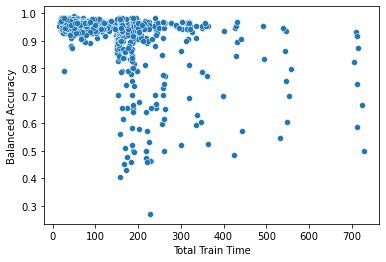

In [19]:
sns.scatterplot(df['Total Train Time'].astype(float), df['Balanced Accuracy'])

<AxesSubplot:xlabel='Balanced Accuracy', ylabel='Count'>

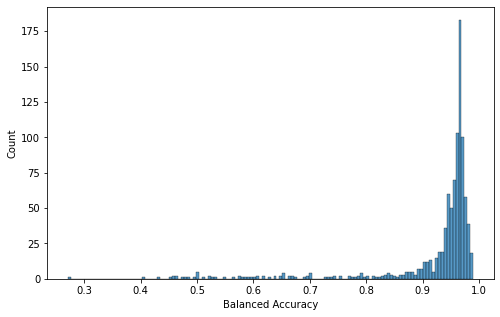

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Balanced Accuracy'])

<AxesSubplot:xlabel='Total Train Time', ylabel='Count'>

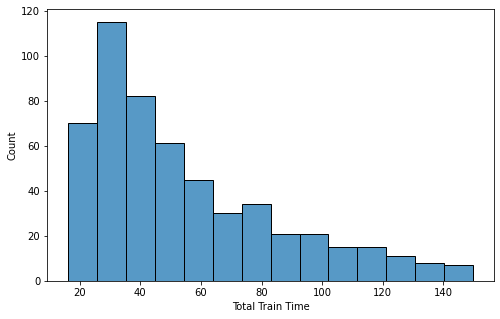

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Total Train Time']<150]['Total Train Time'])

In [12]:
df[df['Freeze Rate']=='100']

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,FPS,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Balanced Accuracy,Name
108,15111,densenet121,100,0,0.0001,Adam,100,2050,1.8945,189.45,1.055688,0.2241,0.2499,0.2117,0.9250,0.943005,0.9375,0.8750,0.90625,densenet121-100-0-0.0001-Adam
109,15112,densenet121,100,0,0.0001,RMSprop,100,2050,1.8999,189.99,1.052687,0.2027,0.2383,0.2545,0.9333,0.948454,0.9479,0.8750,0.91145,densenet121-100-0-0.0001-RMSprop
110,15113,densenet121,100,0,0.0001,SGD,100,2050,1.8995,189.95,1.052909,0.2898,0.3093,0.3277,0.8833,0.918367,0.9271,0.7083,0.81770,densenet121-100-0-0.0001-SGD
111,15121,densenet121,100,0,0.001,Adam,100,2050,1.8981,189.81,1.053685,0.0990,0.1987,0.1616,0.9417,0.953368,0.9479,0.9167,0.93230,densenet121-100-0-0.001-Adam
112,15122,densenet121,100,0,0.001,RMSprop,100,2050,1.8285,182.85,1.093793,0.0759,0.2105,0.2394,0.9167,0.938776,0.9479,0.7917,0.86980,densenet121-100-0-0.001-RMSprop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75322,resnext50_32x4d,100,2,0.001,RMSprop,100,2624002,1.6248,162.48,1.230921,0.1342,0.1886,0.1329,0.9500,0.958763,0.9583,0.9167,0.93750,resnext50_32x4d-100-2-0.001-RMSprop
941,75323,resnext50_32x4d,100,2,0.001,SGD,100,2624002,1.6024,160.24,1.248128,0.1568,0.2023,0.2034,0.9583,0.963351,0.9479,1.0000,0.97395,resnext50_32x4d-100-2-0.001-SGD
942,75331,resnext50_32x4d,100,2,0.01,Adam,100,2624002,1.6233,162.33,1.232058,0.1266,0.1929,0.1636,0.9583,0.963731,0.9583,0.9583,0.95830,resnext50_32x4d-100-2-0.01-Adam
943,75332,resnext50_32x4d,100,2,0.01,RMSprop,100,2624002,1.5952,159.52,1.253761,0.1821,0.1860,0.1883,0.9417,0.952880,0.9375,0.9583,0.94790,resnext50_32x4d-100-2-0.01-RMSprop


In [7]:
hyperparameters = {
	'Base Model': ['mobilenet_v2', 'resnet50', 'resnet18', 'densenet161', 'densenet121', 'inception_v3', 'resnext50_32x4d'],
	'Freeze Rate': ['0', '25', '50', '75', '100'],
	'Layer FCN' : ['0', '1', '2'],
	'Learning Rate': ['0.01', '0.001', '0.0001'],
	'Optimizer' : ['RMSprop', 'SGD', 'Adam']
}

In [13]:
df = df.sort_values(by=['Balanced Accuracy', 'Testing Loss', 'Total Train Time'], ascending=[False, True, True]).reset_index(drop=True)

for param in hyperparameters.keys():
    print('Hyperparameter : '+param)
    for val in hyperparameters[param]:
        filtered = df[df[param]==val]
        print('\t'+val+': Best Rank', int(filtered.iloc[0].name)+1, '-- ', filtered.iloc[0]['Balanced Accuracy'])
        
    

Hyperparameter : Base Model
	mobilenet_v2: Best Rank 2 --  0.9843999999999999
	resnet50: Best Rank 39 --  0.97915
	resnet18: Best Rank 28 --  0.97915
	densenet161: Best Rank 5 --  0.9843999999999999
	densenet121: Best Rank 6 --  0.9843999999999999
	inception_v3: Best Rank 1 --  0.9896
	resnext50_32x4d: Best Rank 4 --  0.9843999999999999
Hyperparameter : Freeze Rate
	0: Best Rank 11 --  0.9843999999999999
	25: Best Rank 19 --  0.97915
	50: Best Rank 1 --  0.9896
	75: Best Rank 3 --  0.9843999999999999
	100: Best Rank 18 --  0.9843999999999999
Hyperparameter : Layer FCN
	0: Best Rank 1 --  0.9896
	1: Best Rank 2 --  0.9843999999999999
	2: Best Rank 5 --  0.9843999999999999
Hyperparameter : Learning Rate
	0.01: Best Rank 1 --  0.9896
	0.001: Best Rank 7 --  0.9843999999999999
	0.0001: Best Rank 2 --  0.9843999999999999
Hyperparameter : Optimizer
	RMSprop: Best Rank 2 --  0.9843999999999999
	SGD: Best Rank 4 --  0.9843999999999999
	Adam: Best Rank 1 --  0.9896


In [16]:
df = df.sort_values(by=['Total Train Time'], ascending=[True]).reset_index(drop=True)

for param in hyperparameters.keys():
    print('Hyperparameter : '+param)
    for val in hyperparameters[param]:
        filtered = df[df[param]==val]
        print('\t'+val+': Best Rank', int(filtered.iloc[0].name)+1, '-- ', filtered.iloc[0]['Total Train Time'], '-- ', filtered.iloc[0]['Epoch Count'])
        
    

Hyperparameter : Base Model
	mobilenet_v2: Best Rank 15 --  20.6388 --  13
	resnet50: Best Rank 32 --  21.994 --  10
	resnet18: Best Rank 1 --  15.989 --  10
	densenet161: Best Rank 24 --  21.381999999999998 --  10
	densenet121: Best Rank 3 --  18.546 --  10
	inception_v3: Best Rank 4 --  18.6758 --  11
	resnext50_32x4d: Best Rank 2 --  17.242 --  10
Hyperparameter : Freeze Rate
	0: Best Rank 10 --  19.717 --  10
	25: Best Rank 3 --  18.546 --  10
	50: Best Rank 4 --  18.6758 --  11
	75: Best Rank 1 --  15.989 --  10
	100: Best Rank 536 --  150.4 --  100
Hyperparameter : Layer FCN
	0: Best Rank 1 --  15.989 --  10
	1: Best Rank 9 --  19.6704 --  12
	2: Best Rank 2 --  17.242 --  10
Hyperparameter : Learning Rate
	0.01: Best Rank 4 --  18.6758 --  11
	0.001: Best Rank 8 --  19.503999999999998 --  10
	0.0001: Best Rank 1 --  15.989 --  10
Hyperparameter : Optimizer
	RMSprop: Best Rank 2 --  17.242 --  10
	SGD: Best Rank 4 --  18.6758 --  11
	Adam: Best Rank 1 --  15.989 --  10


In [8]:
def filter_data(base, freeze_rate, layer_fcn, learning_rate, optimizer):
    return df[(df['Base Model']==base)&(df['Freeze Rate']==freeze_rate)&(df['Layer FCN']==layer_fcn)&(df['Learning Rate']==learning_rate)&(df['Optimizer']==optimizer)].iloc[0]

In [49]:

FR = ['0', '25', '50', '75', '100']
base = ['mobilenet_v2', 'densenet121', 'resnet18', 'resnext50_32x4d', 'resnet50', 'inception_v3', 'densenet161']
fcn = ['0', '1', '2']
lr = ['0.01', '0.001', '0.0001']
opt = ['RMSprop', 'SGD', 'Adam']



for b in base:
    print(b)
    changes = [0 for _ in range(5)]
    counter = 0
    for f in fcn:
        for l in lr:
            for o in opt:
#                 print(df[(df['Base Model']==b)&(df['Layer FCN']==f)&(df['Learning Rate']==l)&(df['Optimizer']==o)])
                nol = filter_data(b, '0', f, l, o)
                dualima = filter_data(b, '25', f, l, o)
                limapuluh = filter_data(b, '50', f, l, o)
                tujuhlima = filter_data(b, '75', f, l, o)
                seratus = filter_data(b, '100', f, l, o)
                

                changes[0] += 0
                changes[1] += dualima['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                changes[2] += limapuluh['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                changes[3] += tujuhlima['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                changes[4] += seratus['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                
                counter+=1
                
#                 for el in changes:
#                     if el < 0:
#                         print(b, f, l, o)
                
#                 break
#             break
#         break
    
    changes = (np.array(changes) / counter)*100
    
    
    
    
    print(changes)
    
#     print(counter)
    print()
#     break
                

                

mobilenet_v2
[ 0.          3.2212963   4.49444444  4.76518519 -0.52166667]

densenet121
[0.         7.44481481 6.48074074 7.42555556 1.61851852]

resnet18
[0.         7.25333333 7.42703704 7.61981481 3.99333333]

resnext50_32x4d
[0.         6.01796296 4.95777778 5.28537037 4.39740741]

resnet50
[0.         5.0337037  7.0212963  7.07833333 5.4       ]

inception_v3
[ 0.          7.67759259  8.00555556 11.61259259  5.32407407]

densenet161
[0.         8.54481481 8.98944444 8.73833333 7.75518519]



In [43]:
def convert_to_string(changes):
    res = []
    
    for c in changes:
        res.append('{:.1f}%'.format(c*100))
    return res

In [44]:
FR = ['0', '25', '50', '75', '100']
base = ['mobilenet_v2', 'densenet121', 'resnet18', 'resnext50_32x4d', 'resnet50', 'inception_v3', 'densenet161']
fcn = ['0', '1', '2']
lr = ['0.01', '0.001', '0.0001']
opt = ['RMSprop', 'SGD', 'Adam']

accuracy_vs_freeze_rate = pd.DataFrame(columns=['0', '25', '50', '75', '100'])


for b in base:
    print(b)
    total = [0 for _ in range(5)]
    changes = [0 for _ in range(5)]
    counter = 0
    for f in fcn:
        for l in lr:
            for o in opt:
#                 print(df[(df['Base Model']==b)&(df['Layer FCN']==f)&(df['Learning Rate']==l)&(df['Optimizer']==o)])
                nol = filter_data(b, '0', f, l, o)
                dualima = filter_data(b, '25', f, l, o)
                limapuluh = filter_data(b, '50', f, l, o)
                tujuhlima = filter_data(b, '75', f, l, o)
                seratus = filter_data(b, '100', f, l, o)
                
#                 print(nol['Total Train Time'])
#                 print(dualima['Total Train Time'])
#                 print(limapuluh['Total Train Time'])
#                 print(tujuhlima['Total Train Time'])
#                 print(seratus['Total Train Time'])
                
                total[0] += nol['Balanced Accuracy']
                total[1] += dualima['Balanced Accuracy']
                total[2] += limapuluh['Balanced Accuracy']
                total[3] += tujuhlima['Balanced Accuracy']
                total[4] += seratus['Balanced Accuracy']
        
        
                changes[0] += 0
                changes[1] += dualima['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                changes[2] += limapuluh['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                changes[3] += tujuhlima['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                changes[4] += seratus['Balanced Accuracy'] - nol['Balanced Accuracy'] 
                
                
                counter+=1
                
#                 print('----')
#                 print(total)
#                 print(changes)
#                 break
#             break
#         break
    
    total = np.array(total) / counter
    total = total.tolist()
    total = convert_to_string(total)
    accuracy_vs_freeze_rate.loc[b+' rata-rata waktu latih'] = total
    
    changes = np.array(changes) / counter
    changes = changes.tolist()
    changes = convert_to_string(changes)
    accuracy_vs_freeze_rate.loc[b+' perbedaan'] = changes
    
    for el in total:
        print(el, end=', ')
    print()
    
    for el in changes:
        print(el, end=', ')
#     print(changes)
    
    print(counter)
    print()
#     break
                

                

mobilenet_v2
91.3%, 94.5%, 95.8%, 96.0%, 90.7%, 
0.0%, 3.2%, 4.5%, 4.8%, -0.5%, 27

densenet121
88.2%, 95.6%, 94.6%, 95.6%, 89.8%, 
0.0%, 7.4%, 6.5%, 7.4%, 1.6%, 27

resnet18
87.5%, 94.8%, 94.9%, 95.1%, 91.5%, 
0.0%, 7.3%, 7.4%, 7.6%, 4.0%, 27

resnext50_32x4d
89.2%, 95.2%, 94.2%, 94.5%, 93.6%, 
0.0%, 6.0%, 5.0%, 5.3%, 4.4%, 27

resnet50
88.1%, 93.2%, 95.1%, 95.2%, 93.5%, 
0.0%, 5.0%, 7.0%, 7.1%, 5.4%, 27

inception_v3
80.8%, 88.5%, 88.8%, 92.4%, 86.1%, 
0.0%, 7.7%, 8.0%, 11.6%, 5.3%, 27

densenet161
87.0%, 95.5%, 96.0%, 95.7%, 94.8%, 
0.0%, 8.5%, 9.0%, 8.7%, 7.8%, 27



In [46]:
accuracy_vs_freeze_rate.to_excel('accuracy_vs_freeze_rate.xlsx')
accuracy_vs_freeze_rate

,0,25,50,75,100
mobilenet_v2 rata-rata waktu latih,91.3%,94.5%,95.8%,96.0%,90.7%
mobilenet_v2 perbedaan,0.0%,3.2%,4.5%,4.8%,-0.5%
densenet121 rata-rata waktu latih,88.2%,95.6%,94.6%,95.6%,89.8%
densenet121 perbedaan,0.0%,7.4%,6.5%,7.4%,1.6%
resnet18 rata-rata waktu latih,87.5%,94.8%,94.9%,95.1%,91.5%
resnet18 perbedaan,0.0%,7.3%,7.4%,7.6%,4.0%
resnext50_32x4d rata-rata waktu latih,89.2%,95.2%,94.2%,94.5%,93.6%
resnext50_32x4d perbedaan,0.0%,6.0%,5.0%,5.3%,4.4%
resnet50 rata-rata waktu latih,88.1%,93.2%,95.1%,95.2%,93.5%
resnet50 perbedaan,0.0%,5.0%,7.0%,7.1%,5.4%


In [26]:
def convert_to_min(changes):
    res = []
    
    for change in changes:
        abs_change = abs(change)
        convert = str(int(abs_change//60))+'m'+str(int(abs_change%60))+'s'
        if change < 0:
            convert = '-'+convert
        res.append(convert)
    return res

In [28]:
FR = ['0', '25', '50', '75', '100']
base = ['mobilenet_v2', 'densenet121', 'resnet18', 'resnext50_32x4d', 'resnet50', 'inception_v3', 'densenet161']
fcn = ['0', '1', '2']
lr = ['0.01', '0.001', '0.0001']
opt = ['RMSprop', 'SGD', 'Adam']

time_vs_freeze_rate = pd.DataFrame(columns=['0', '25', '50', '75', '100'])


for b in base:
    print(b)
    total = [0 for _ in range(5)]
    changes = [0 for _ in range(5)]
    counter = 0
    for f in fcn:
        for l in lr:
            for o in opt:
#                 print(df[(df['Base Model']==b)&(df['Layer FCN']==f)&(df['Learning Rate']==l)&(df['Optimizer']==o)])
                nol = filter_data(b, '0', f, l, o)
                dualima = filter_data(b, '25', f, l, o)
                limapuluh = filter_data(b, '50', f, l, o)
                tujuhlima = filter_data(b, '75', f, l, o)
                seratus = filter_data(b, '100', f, l, o)
                
#                 print(nol['Total Train Time'])
#                 print(dualima['Total Train Time'])
#                 print(limapuluh['Total Train Time'])
#                 print(tujuhlima['Total Train Time'])
#                 print(seratus['Total Train Time'])
                
                total[0] += nol['Total Train Time']
                total[1] += dualima['Total Train Time']
                total[2] += limapuluh['Total Train Time']
                total[3] += tujuhlima['Total Train Time']
                total[4] += seratus['Total Train Time']
        
        
                changes[0] += 0
                changes[1] += dualima['Total Train Time'] - nol['Total Train Time'] 
                changes[2] += limapuluh['Total Train Time'] - nol['Total Train Time'] 
                changes[3] += tujuhlima['Total Train Time'] - nol['Total Train Time'] 
                changes[4] += seratus['Total Train Time'] - nol['Total Train Time'] 
                
                counter+=1
                
#                 print('----')
#                 print(total)
#                 print(changes)
#                 break
#             break
#         break
    
    total = np.array(total) / counter
    total = convert_to_min(total)
    time_vs_freeze_rate.loc[b+' rata-rata waktu latih'] = total
    
    changes = np.array(changes) / counter
    changes = convert_to_min(changes)
    time_vs_freeze_rate.loc[b+' perbedaan'] = changes
    
    for el in total:
        print(el, end=', ')
    print()
    
    for el in changes:
        print(el, end=', ')
#     print(changes)
    
    print(counter)
    print()
#     break
                

                

mobilenet_v2
2m0s, 1m39s, 1m18s, 1m11s, 2m38s, 
0m0s, -0m21s, -0m42s, -0m49s, 0m37s, 27

densenet121
2m13s, 1m11s, 1m7s, 1m16s, 3m6s, 
0m0s, -1m2s, -1m6s, -0m56s, 0m53s, 27

resnet18
1m49s, 1m34s, 1m5s, 0m57s, 3m21s, 
0m0s, -0m15s, -0m43s, -0m51s, 1m31s, 27

resnext50_32x4d
2m20s, 1m13s, 1m3s, 0m59s, 2m40s, 
0m0s, -1m6s, -1m16s, -1m21s, 0m20s, 27

resnet50
4m55s, 2m45s, 2m15s, 1m53s, 3m11s, 
0m0s, -2m10s, -2m39s, -3m2s, -1m44s, 27

inception_v3
2m28s, 1m41s, 1m11s, 1m14s, 2m37s, 
0m0s, -0m47s, -1m17s, -1m13s, 0m9s, 27

densenet161
5m19s, 2m17s, 2m11s, 1m47s, 5m7s, 
0m0s, -3m2s, -3m8s, -3m32s, -0m12s, 27



In [30]:
time_vs_freeze_rate.to_excel('time_vs_freeze_rate.xlsx', index=False)
time_vs_freeze_rate

,0,25,50,75,100
mobilenet_v2 rata-rata waktu latih,2m0s,1m39s,1m18s,1m11s,2m38s
mobilenet_v2 perbedaan,0m0s,-0m21s,-0m42s,-0m49s,0m37s
densenet121 rata-rata waktu latih,2m13s,1m11s,1m7s,1m16s,3m6s
densenet121 perbedaan,0m0s,-1m2s,-1m6s,-0m56s,0m53s
resnet18 rata-rata waktu latih,1m49s,1m34s,1m5s,0m57s,3m21s
resnet18 perbedaan,0m0s,-0m15s,-0m43s,-0m51s,1m31s
resnext50_32x4d rata-rata waktu latih,2m20s,1m13s,1m3s,0m59s,2m40s
resnext50_32x4d perbedaan,0m0s,-1m6s,-1m16s,-1m21s,0m20s
resnet50 rata-rata waktu latih,4m55s,2m45s,2m15s,1m53s,3m11s
resnet50 perbedaan,0m0s,-2m10s,-2m39s,-3m2s,-1m44s


In [20]:
testing_eval = {"Nfpr": [0.0, 1.0], "Ntpr": [0.0, 1.0], "FPR": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.041666666666666664, 0.041666666666666664, 1.0], "TPR": [0.0, 0.28125, 0.3125, 0.34375, 0.3645833333333333, 0.3854166666666667, 0.40625, 0.4375, 0.4791666666666667, 0.96875, 0.96875, 1.0, 1.0]}

Text(0.5, 1.0, '[14122] densenet121-75-0-0.001-RMSprop')

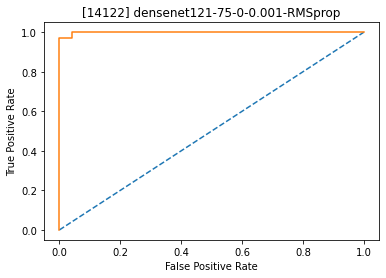

In [22]:
plt.plot(testing_eval['Nfpr'], testing_eval['Ntpr'], linestyle='--')
plt.plot(testing_eval['FPR'], testing_eval['TPR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[14122] densenet121-75-0-0.001-RMSprop')